# Problem 8

## Retrieve the MNIST handwriting data

In [83]:
from sklearn.datasets import fetch_mldata
from math import sqrt
mnist = fetch_mldata('MNIST original')

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [84]:
X = mnist["data"]
y = mnist["target"]
print("Data set conatains {} images with {} features.".format(*X.shape))
print("The features are a {}x{} array of pixels".format(sqrt(X.shape[1]), sqrt(X.shape[1])))

Data set conatains 70000 images with 784 features.
The features are a 28.0x28.0 array of pixels


## let's display an example of one image

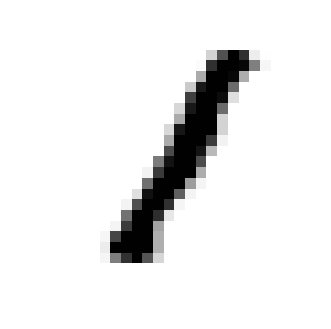

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import binary
import seaborn as sns
sns.set()

# pick out a digit from the data set
digit_index = 6563
ex_digit = X[digit_index]
# the data is a 1D array of numbers, we want it as a 2D array of pixels
ex_digit_img = ex_digit.reshape(28, 28)

# show the image
plt.imshow(ex_digit_img, cmap=binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [86]:
print("This was an image of a {}".format(y[digit_index]))

This was an image of a 1.0


## Split up our data into Training, Validation, and Testing

In [87]:
import numpy as np
# shuffle the data
shuffle = np.random.permutation(70000)
X = X[shuffle]
y = y[shuffle]
Ntrain = 1000
Nvalidate = 10000
Ntest = 10000
# make sure the data allocations do not exceed the total 
#  number of entries in the database
if (Ntrain+Nvalidate+Ntest < y.shape[0]):
    # dividing up the images
    X_train = X[:Ntrain]
    X_validate = X[Ntrain:Ntrain+Nvalidate]
    X_test = X[Ntrain+Nvalidate:Ntrain+Nvalidate+Ntest]
    # dividing up the targets
    y_train = y[:Ntrain]
    y_validate = y[Ntrain:Ntrain+Nvalidate]
    y_test = y[Ntrain+Nvalidate:Ntrain+Nvalidate+Ntest]
    
else:
    print("Cannot divide up data that way, exiting.")
    raise ValueError
    
# make sure that each set contains all of the values
print("Training set contains values: ", set(y_train))
print("Validation set contains values: ", set(y_validate))
print("Testing set contains values: ", set(y_test))

Done dividing up the data
Training set contains values:  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}
Validation set contains values:  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}
Testing set contains values:  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}


## Figuring out digits through a random forest

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


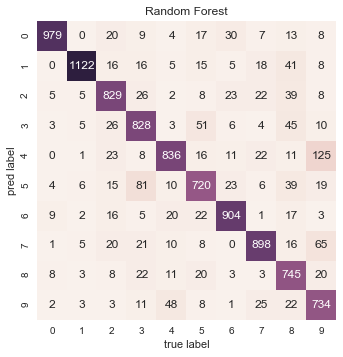

In [88]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10,
#                                bootstrap=True, n_jobs=-1, verbose=1, 
#                                max_samples=1000)
#bagging_clf.fit(X_train, y_train)

# create the classifier for the random forest and train it
rnd_for_clf = RandomForestClassifier(n_estimators=20, n_jobs=-1, verbose=1)
rnd_for_clf.fit(X_train, y_train)

# use our classifier to classify the test set of data
y_pred_for = rnd_for_clf.predict(X_test)

# plot the result
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_for)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('pred label')
plt.title("Random Forest")
plt.show()

## Now, using Extra-Trees

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


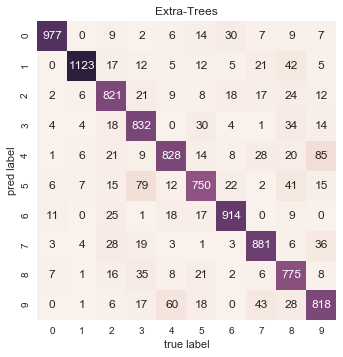

In [89]:
from sklearn.ensemble import ExtraTreesClassifier

# create and train the extra trees classifier
ex_trees_clf = ExtraTreesClassifier(n_estimators=20, n_jobs=-1, verbose=1)
ex_trees_clf.fit(X_train, y_train)

# use the classifier to predict values of the test data
y_pred_ex = ex_trees_clf.predict(X_test)

# plot the result
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_ex)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('pred label')
plt.title("Extra-Trees")
plt.show()

## SVM

Finished training in 1.308183193206787 seconds


/Users/michaeltopping/miniconda3/envs/uclaml/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


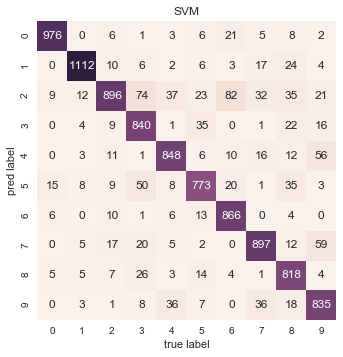

In [90]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from time import time

# to see how long this takes
starttime = time()

# create the classifier here
gauss_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", degree=2, coef0=1, C=10))
    ))

# uncomment if you want to use a linear SVC, which is a bit faster
#gauss_kernel_svm_clf = Pipeline((
#        ("scaler", StandardScaler()),
#        ("linear_clf", LinearSVC(C=1, loss="hinge"))
#    ))

# only use a subset of the training data for speed
#gauss_kernel_svm_clf.fit(X_train.astype(np.float64)[:500], y_train[:500])
gauss_kernel_svm_clf.fit(X_train.astype(np.float64), y_train)

# print how long it took to run
print("Finished training in {} seconds".format(time()-starttime))

# use our trained classifier to predict the values
y_pred_svm = gauss_kernel_svm_clf.predict(X_test)

# plot the comparison of predicted vs. true values
mat = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('pred label')
plt.title("SVM")
plt.show()

## Let's do some voting

(10000,) (10000,)
(2, 10000)


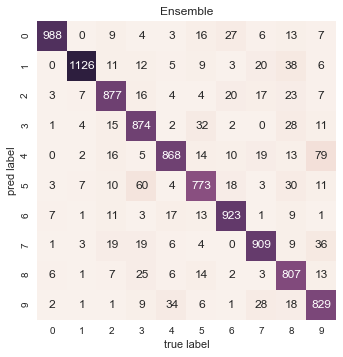

In [91]:
from collections import Counter


# array that will hold the ensemble results
y_pred_ens = []

# loop through a the stacked list of predictions from the previous 3 methods
for row in np.vstack((y_pred_for, y_pred_ex, y_pred_svm)).T:
    
    # count the occurence of each value among the three methods
    count = Counter(row).most_common()[0]
    
    
    # check to make sure there is a majority of votes
    if (count[1] > 1):
        y_pred_ens.append(count[0])
    else:
        # default to the extra trees value
        y_pred_ens.append(row[1])
        
        
        
# plot the result of voting
mat = confusion_matrix(y_test, y_pred_ens)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('pred label')
plt.title("Ensemble")
plt.show()
